In [1]:
#Paso 1 carga de las librerias necesarias

import numpy as np
import pandas as pd

# VISUALIZACION DE DATOS
import matplotlib.pyplot as plt
import seaborn as sns

# ESTADISTICAS
from statsmodels.graphics.gofplots import qqplot
# Esta funcion compara la distribucion de la muestra con una distribucion normal, 
# para comprobar si tu muestra se distribuye normalmente o no.

In [2]:
# Cargar los datos en un dataframe
Velocidad_ProvTrimestral = pd.read_csv(r'C:\Users\oomph\Documents\Henry Data Science\DTS09_Proyecto_Individual02\Proyecto-TelecomArg\historico_velocidad_internet.csv', sep = ',')
Velocidad_ProvTrimestral.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,3,"62,46",Jul-Sept 2022
1,2022,2,"58,44",Abr-Jun 2022
2,2022,1,"55,11",Ene-Mar 2022
3,2021,4,"52,34",Oct-Dic 2021
4,2021,3,"48,46",Jul-Sept 2021


In [3]:
# Revisar calidad de los datos
Velocidad_ProvTrimestral.isnull().sum() # Revisar si hay valores faltantes
Velocidad_ProvTrimestral.dtypes # Verificar los tipos de datos de cada columna



Año                        int64
Trimestre                  int64
Mbps (Media de bajada)    object
Trimestre.1               object
dtype: object

In [4]:
# Renombrar columnas
Velocidad_ProvTrimestral = Velocidad_ProvTrimestral.rename(columns={"Mbps (Media de bajada)": "Velocidad Media Bajada"})



In [5]:
# Resumen estadístico de la variable "Velocidad Media Bajada"
Velocidad_ProvTrimestral["Velocidad Media Bajada"].describe() # Estadísticas descriptivas



count        35
unique       35
top       62,46
freq          1
Name: Velocidad Media Bajada, dtype: object

In [9]:
# Reemplazar la coma por un punto en la columna "Velocidad Media Bajada"
Velocidad_ProvTrimestral["Velocidad Media Bajada"] = Velocidad_ProvTrimestral["Velocidad Media Bajada"].str.replace(",", ".")

# Convertir variable "Velocidad Media Bajada" a flotante
Velocidad_ProvTrimestral["Velocidad Media Bajada"] = Velocidad_ProvTrimestral["Velocidad Media Bajada"].astype(float)


AttributeError: Can only use .str accessor with string values!

C:\Users\oomph\AppData\Local\Temp\ipykernel_936\2016940757.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_vel_prov_trimest = Velocidad_ProvTrimestral.corr()


<AxesSubplot: >

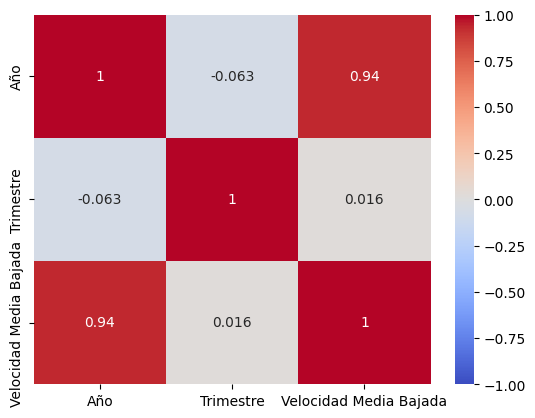

In [15]:
# Matriz de correlación - Velocidad Prov Trimestral
corr_vel_prov_trimest = Velocidad_ProvTrimestral.corr()
sns.heatmap(corr_vel_prov_trimest, annot=True, cmap="coolwarm", vmin=-1, vmax=1) # Mapa de calor


<AxesSubplot: xlabel='Velocidad Media Bajada', ylabel='Count'>

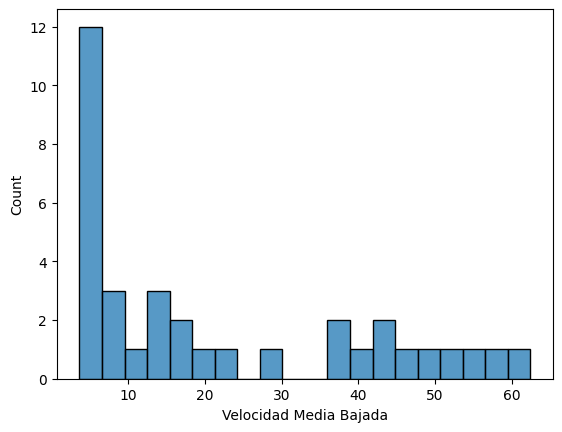

In [10]:

# Visualización de la distribución
sns.histplot(data=Velocidad_ProvTrimestral, x="Velocidad Media Bajada", bins=20) # Histograma

<AxesSubplot: xlabel='Velocidad Media Bajada'>

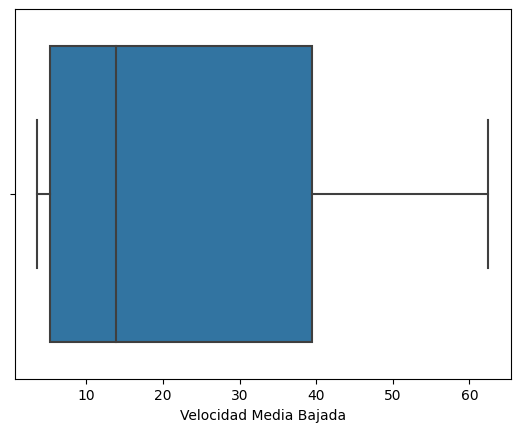

In [11]:
# Visualización de la distribución
sns.boxplot(data=Velocidad_ProvTrimestral, x="Velocidad Media Bajada") # Diagrama de caja y bigotes

In [12]:
# Agrupación y análisis de tendencias
Velocidad_ProvTrimestral.groupby("Año")["Velocidad Media Bajada"].mean() # Calcular el promedio por año
Velocidad_ProvTrimestral.groupby("Trimestre")["Velocidad Media Bajada"].mean() # Calcular el promedio por trimestre
Velocidad_ProvTrimestral.groupby(["Año", "Trimestre"])["Velocidad Media Bajada"].agg(["mean", "median"]) # Calcular promedio y mediana por año y trimestre
Velocidad_ProvTrimestral.groupby("Trimestre.1")["Velocidad Media Bajada"].mean() # Calcular el promedio por trimestre.1



Trimestre.1
Abr-Jun 2014      3.76
Abr-Jun 2015      4.55
Abr-Jun 2016      5.42
Abr-Jun 2017      7.16
Abr-Jun 2018     13.85
Abr-Jun 2019     20.33
Abr-Jun 2020     38.32
Abr-Jun 2021     45.63
Abr-Jun 2022     58.44
Ene-Mar 2014      3.62
Ene-Mar 2015      4.35
Ene-Mar 2016      5.08
Ene-Mar 2017      6.62
Ene-Mar 2018     13.22
Ene-Mar 2019     17.38
Ene-Mar 2020     37.52
Ene-Mar 2021     43.11
Ene-Mar 2022     55.11
Jul-Sept 2014     3.87
Jul-Sept 2015     4.79
Jul-Sept 2016     5.94
Jul-Sept 2017     8.34
Jul-Sept 2018    15.36
Jul-Sept 2019    24.18
Jul-Sept 2020    40.67
Jul-Sept 2021    48.46
Jul-Sept 2022    62.46
Oct-Dic 2014      4.16
Oct-Dic 2015      4.99
Oct-Dic 2016      6.34
Oct-Dic 2017     12.01
Oct-Dic 2018     15.95
Oct-Dic 2019     28.26
Oct-Dic 2020     42.36
Oct-Dic 2021     52.34
Name: Velocidad Media Bajada, dtype: float64

<AxesSubplot: xlabel='Año', ylabel='Velocidad Media Bajada'>

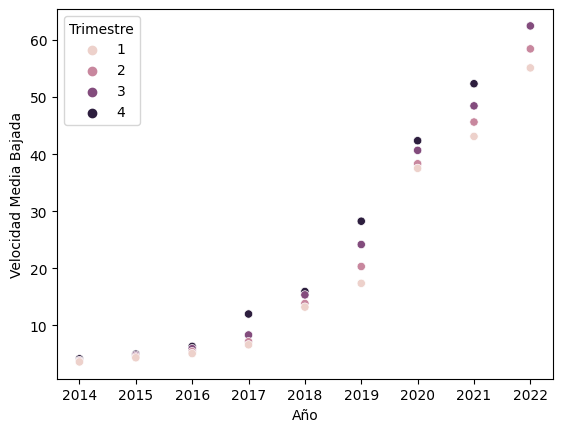

In [13]:
# Análisis exploratorio bivariado
sns.scatterplot(data=Velocidad_ProvTrimestral, x="Año", y="Velocidad Media Bajada", hue="Trimestre") # Scatter plot para comparar Velocidad Media Bajada y Año por Trimestre



<AxesSubplot: >

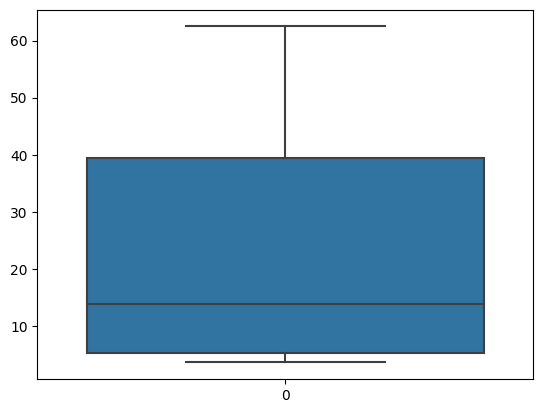

In [14]:
# Detección de outliers
sns.boxplot(data=Velocidad_ProvTrimestral["Velocidad Media Bajada"]) # Verificar si hay outliers
